1. Use petrol_consumption dataset. Your task is to predict the gas consumption (in millions of gallons) in 48 of the US states based on petrol tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with the driving license. Build the regression model using Random Forest Regressor. Analyze the prediction ability of your model. 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving petrol_consumption.csv to petrol_consumption.csv


In [ ]:
petroldf = pd.read_csv("petrol_consumption.csv")
petroldf.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
petroldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [ ]:
petroldf.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [ ]:
x=petroldf.iloc[:,0:4].values
y=petroldf.iloc[:, 4].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.2 , random_state= 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=30,random_state= 0)
regressor.fit(X_train,Y_train)
Y_Pre=regressor.predict(X_test)

In [ ]:
from sklearn import metrics
print(' Mean Absolute Error',metrics.mean_absolute_error(Y_test,Y_Pre))
print(' Mean Absolute Error',metrics.mean_squared_error(Y_test,Y_Pre))
print(' Mean Absolute Error',np.sqrt(metrics.mean_squared_error(Y_test,Y_Pre)))

 Mean Absolute Error 50.60333333333332
 Mean Absolute Error 3933.2429999999977
 Mean Absolute Error 62.715572228912954


2. Use the wine dataset, which is a very famous multi-class classification problem. This data is the result of a chemical analysis of wines grown in the same region in Italy using three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. The dataset comprises 13 features ('alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline') and a target (type of cultivars). This data has three types of cultivar classes: 'class_0', 'class_1', and 'class_2'.  
Your task is to build a model using k-nn classifier to classify the type of cultivar. Access the performance of your model using different values of ‘k’. 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving wine.csv to wine.csv


In [ ]:
winedf = pd.read_csv("wine.csv",sep=",",names = ['class','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
winedf.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
winedf


,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
winedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [ ]:
winedf.shape 

(178, 14)

In [ ]:
winedf.value_counts()

class  Alcohol  Malic acid  Ash   Alcalinity of ash  Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity  Hue   OD280/OD315 of diluted wines  Proline
3      14.34    1.68        2.70  25.0               98         2.80           1.31        0.53                  2.70             13.00            0.57  1.96                          660        1
1      14.10    2.16        2.30  18.0               105        2.95           3.32        0.22                  2.38             5.75             1.25  3.17                          1510       1
2      11.61    1.35        2.70  20.0               94         2.74           2.92        0.29                  2.49             2.65             0.96  3.26                          680        1
       11.56    2.05        3.23  28.5               119        3.18           5.08        0.47                  1.87             6.00             0.93  3.69                          465        1
       11.46    3.74     

In [ ]:
winedf.dtypes

class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [ ]:
winedf.isnull().sum()

class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [ ]:
winedf.corr()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


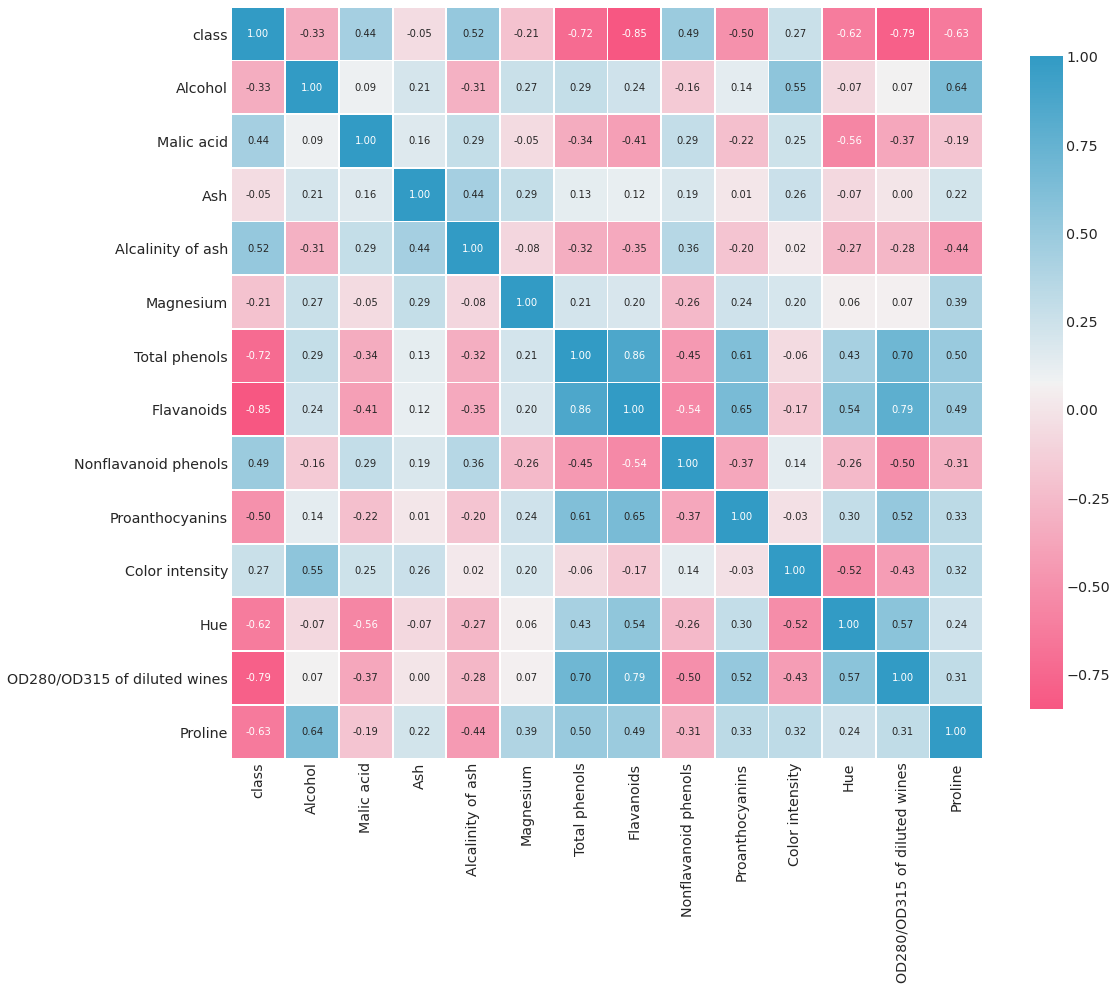

In [ ]:
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(winedf.corr(), cmap=cmap, cbar_kws={'shrink': .8}, square=True, annot=True, fmt='.2f', linewidths=.8)
plt.show()

In [ ]:
import scipy.stats as stats
sns.set(rc={'figure.figsize':(10,6)})
sns.set(font_scale=1.3)
plt.style.use('fivethirtyeight')


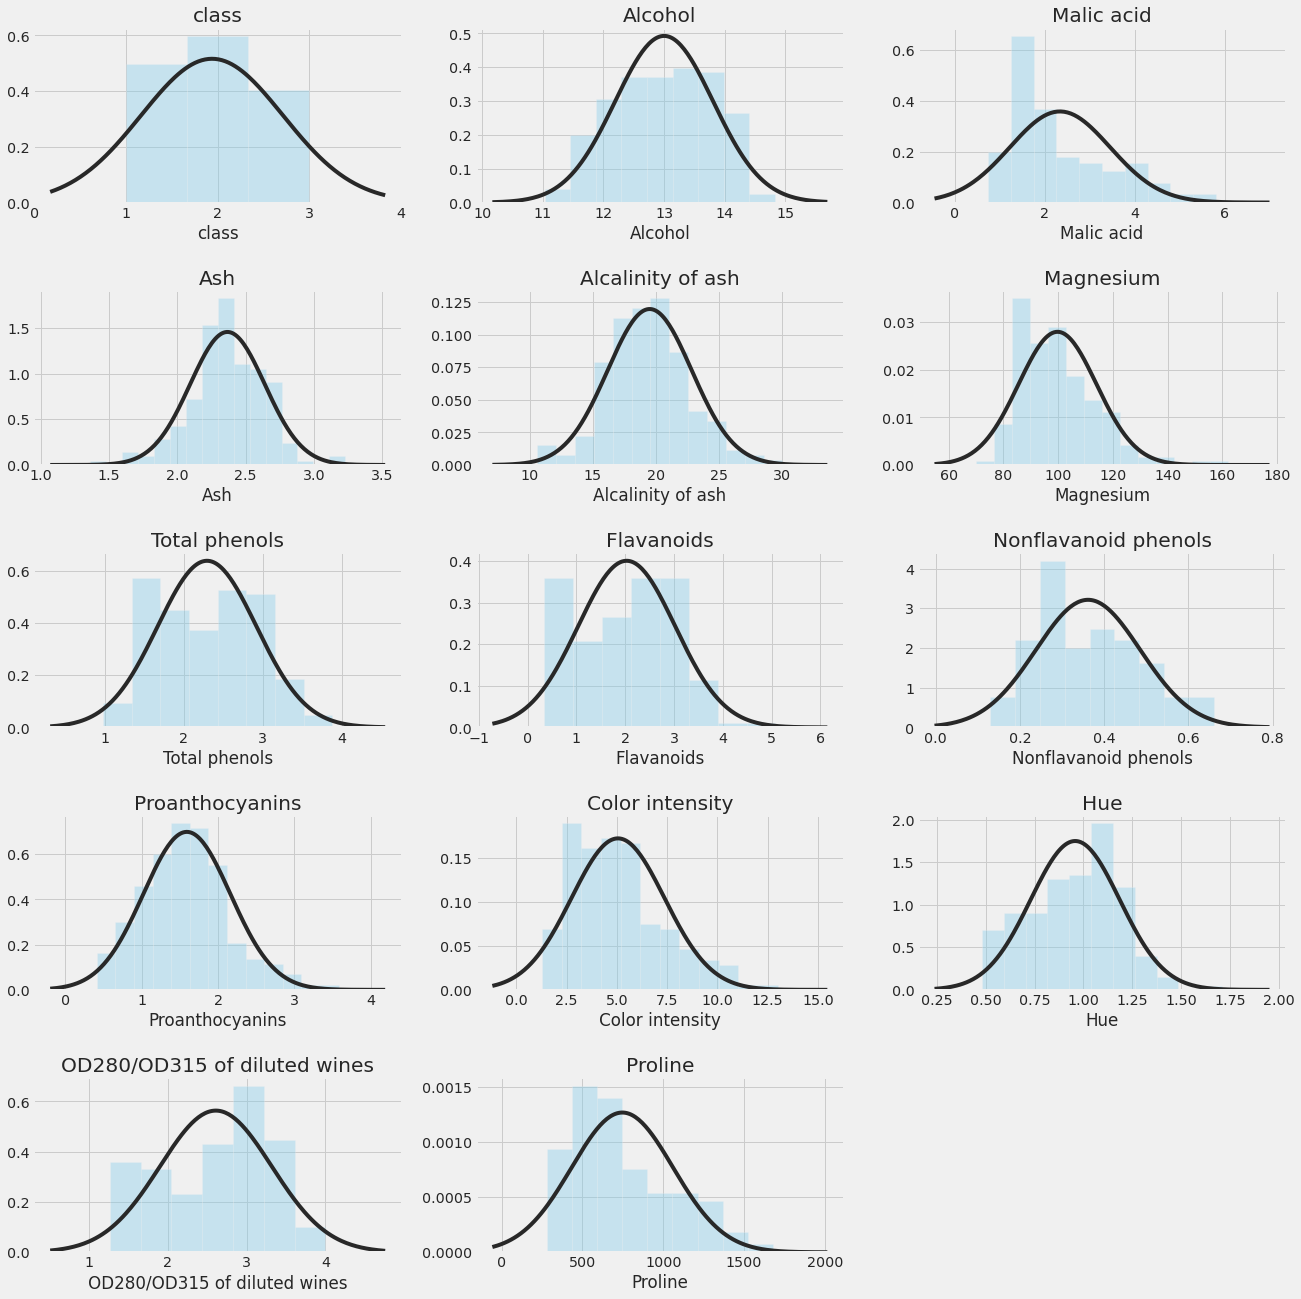

In [ ]:
columns = winedf.columns
plt.subplots(figsize=(20,30))
length = len(columns)

for i, j in zip(columns, range(length)):
    plt.subplot((length/2), 3, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.5)
    sns.distplot(winedf[i], kde=False, fit=stats.norm, color='skyblue')
    plt.title(i)

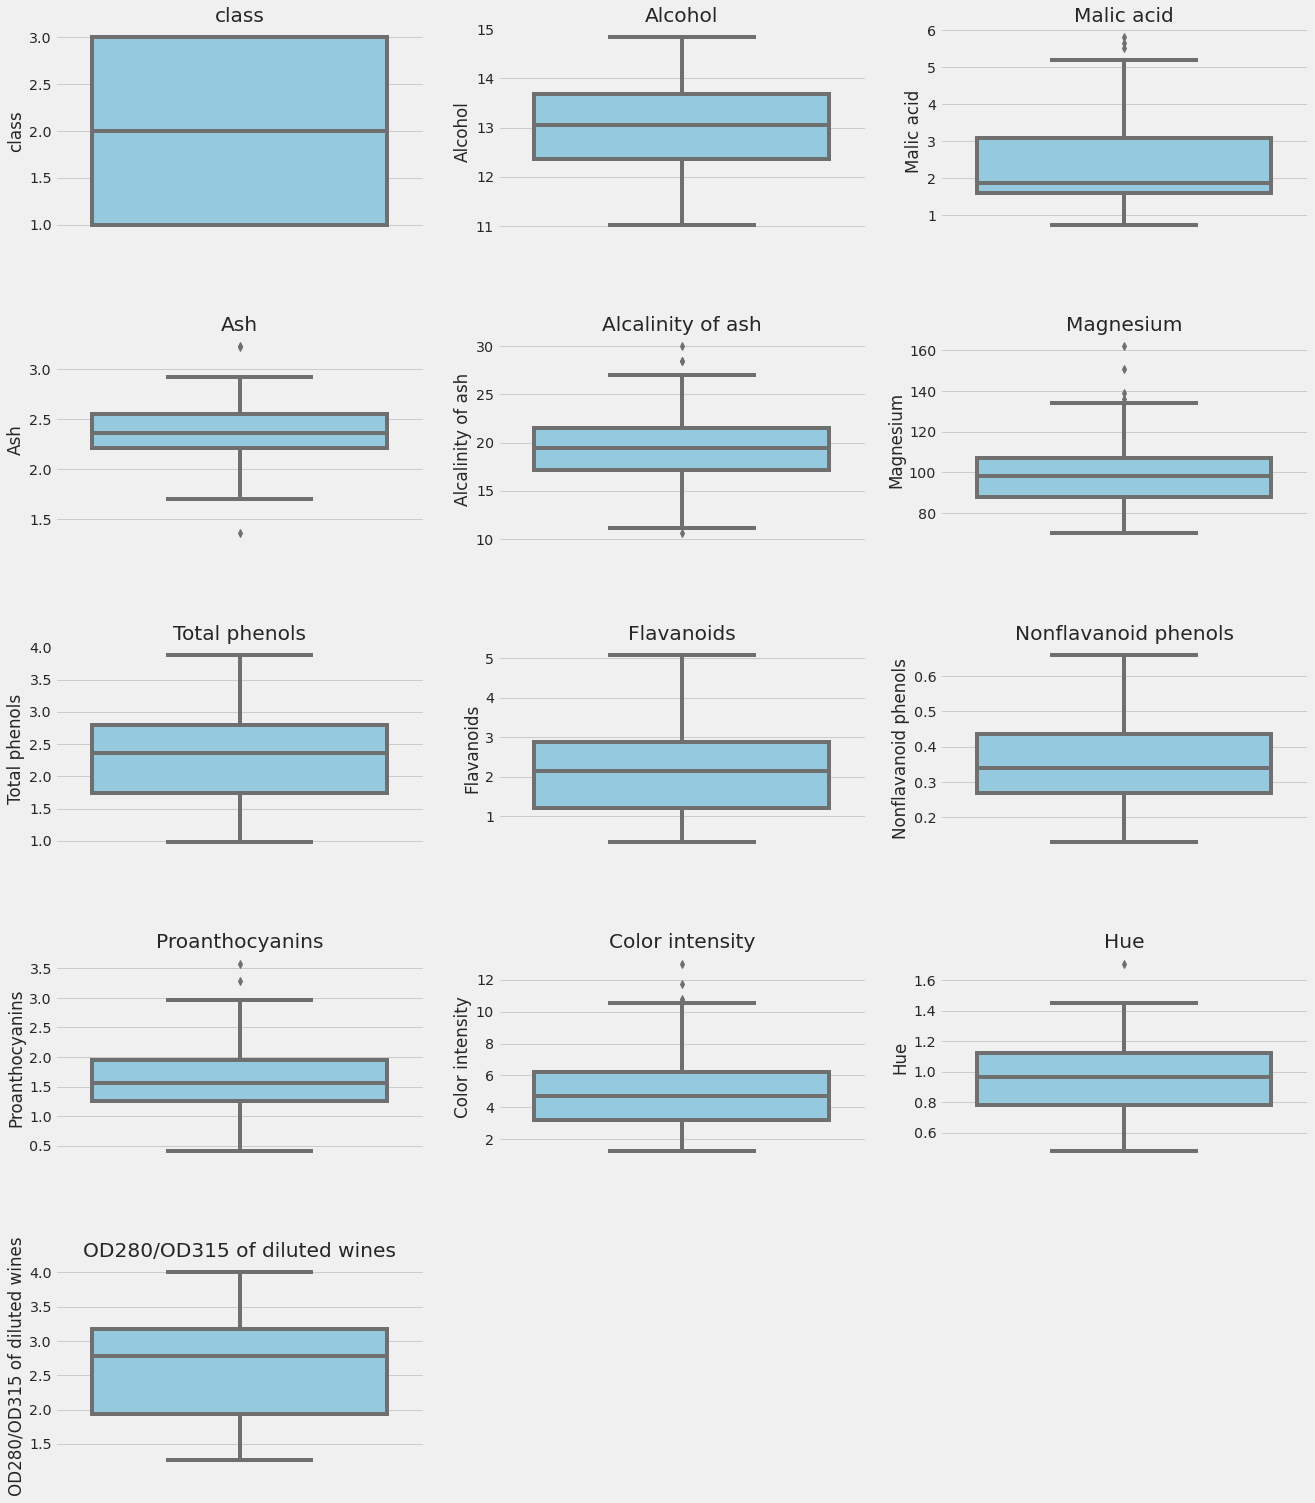

In [ ]:
columns = winedf.columns[:13]
plt.subplots(figsize=(20,30))
length = len(columns)

for i, j in zip(columns, range(length)):
    plt.subplot((length/2), 3, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.5)
    sns.boxplot(y=winedf[i], color='skyblue')
    plt.title(i)

In [ ]:
X= winedf.drop(['Ash'], axis=1)

X.head()

,class,Alcohol,Malic acid,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
Y=winedf.iloc[:,:1]
Y.head(2)

,class
0,1
1,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)

(124, 13)
(54, 13)


In [ ]:
from sklearn.model_selection import KFold

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

label = winedf.pop('class')
wine = StandardScaler().fit_transform(winedf)

model = KNeighborsClassifier(n_neighbors=3, metric= 'minkowski', p=2)
model.fit(wine, label)

pred = model.predict(wine)
 #   train_accuracy[i] = knn.score(X_train, Y_train)  
  #  test_accuracy[i] = knn.score(X_test, Y_test) 

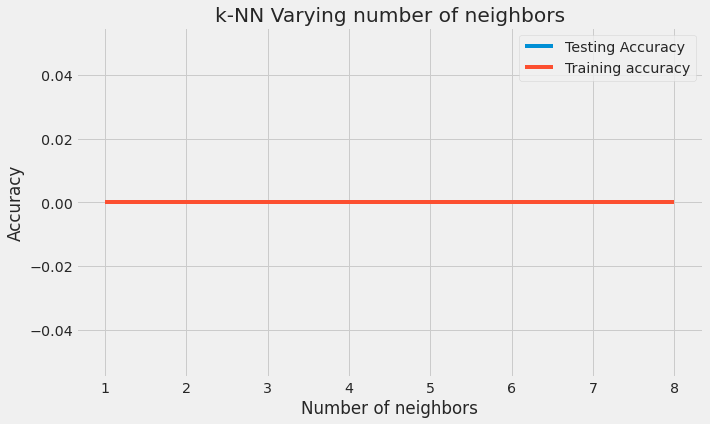

In [ ]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
print(knn.score(X_test,Y_test)*100)

77.77777777777779


3. Use iris flower dataset to create classification model. Your task is to predict the class to which these plants belong. There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris virginica. Create the classification model using k-nn classifier and evaluate the performance of your classifier. Find the best value of ‘k’ for iris dataset. 

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sn 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import pandas as pd
%matplotlib inline

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving iris.csv to iris.csv


In [ ]:
dataset = pd.read_csv("iris.csv",names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Species'])

In [ ]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print(dataset.shape)

(150, 5)


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
dataset.info()
set(dataset['Species'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [ ]:
y=dataset.Species.values
x_data=dataset.drop(["Species"],axis=1).values

In [ ]:
#Normalization of data
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
# KNN- algorithm
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors =7)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

In [ ]:
print("{} knn score:{}".format(7,knn.score(x_test,y_test)*100))

7 knn score:97.77777777777777


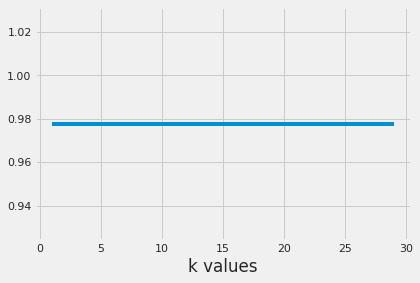

In [ ]:
import matplotlib.pyplot as plt
score_list=[]
for each in range(1,30):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
plt.plot(range(1,30),score_list)
plt.xlabel("k values")
plt.ylabel=("accuracy")
plt.show()

5. Use iris dataset of Q3 and build the k-nn model using k-fold cross validation, stratified cross fold validation. Compare the results of train_test_split, k-fold and skfold validation techniques.  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, x_data, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 94.67%


In [ ]:
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold = LogisticRegression()
results_skfold = model_selection.cross_val_score(model_skfold, x_data, y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 97.33%


4. Use breast cancer dataset, build classification model using k-nn classifier for predicting whether a person suffers from cancer or not. Find the best value of ‘k’ for breast cancer dataset. Evaluate  the performance of your model for different ‘k’ values. 

In [ ]:
import itertools
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn import metrics
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
#from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import matplotlib.pyplot as pl
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving breastCancer.csv to breastCancer (1).csv


In [ ]:
col_names=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
dataset = pd.read_csv('breastCancer.csv', header=0, names = col_names)
array = dataset.values

dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
dataset = dataset.drop(columns = ['Sample code number'])

In [ ]:
dataset['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [ ]:
dataset_absent = dataset[dataset['Bare Nuclei']=='?']
dataset_absent = dataset_absent.reset_index()
dataset_absent = dataset_absent.drop(columns=['index'])
dataset_absent

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,8,4,5,1,2,?,7,3,1,4
1,6,6,6,9,6,?,7,8,1,2
2,1,1,1,1,1,?,2,1,1,2
3,1,1,3,1,2,?,2,1,1,2
4,1,1,2,1,3,?,1,1,1,2
5,5,1,1,1,2,?,3,1,1,2
6,3,1,4,1,2,?,3,1,1,2
7,3,1,1,1,2,?,3,1,1,2
8,3,1,3,1,2,?,2,1,1,2
9,8,8,8,1,2,?,6,10,1,4


In [ ]:
df_present = dataset[dataset['Bare Nuclei']!='?']
df_present = df_present.reset_index()
df_present = df_present.drop(columns=["index"])
df_present = df_present.astype(np.float64)
df_present.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


In [ ]:
df_present_temp = df_present.drop(columns=['Bare Nuclei'])
xm = df_present_temp.values
ym = df_present['Bare Nuclei'].values

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(xm, ym, test_size=0.2, random_state=4)

In [ ]:
neighbors = np.arange(1,9)
neighbors
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [ ]:
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(train_x, train_y)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_x, train_y)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_x, test_y)
    

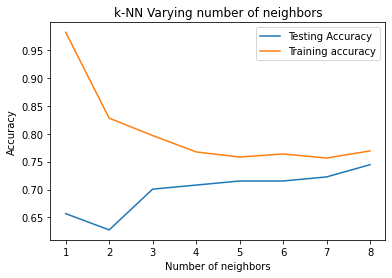

In [ ]:
from sklearn.model_selection import KFold
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)
#Fit the model
knn.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
knn.score(test_x, test_y)

0.7226277372262774

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(test_x)
confusion_matrix(test_y,y_pred)

array([[75,  1,  0,  0,  0,  0,  0,  0,  3],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  2],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  7],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  4],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  1,  0,  2,  0, 24]])

In [ ]:
#Confusion matrix can also be obtained using crosstab method of pandas.
pd.crosstab(test_y, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1.0,2.0,3.0,5.0,8.0,10.0,All
True,,,,,,,
1.0,75,1,0,0,0,3,79
2.0,3,0,0,0,0,0,3
3.0,4,0,0,0,0,0,4
4.0,3,1,0,0,0,2,6
5.0,2,0,0,0,0,7,9
7.0,0,0,0,0,0,2,2
8.0,0,0,0,0,0,4,4
9.0,0,0,1,0,0,0,1
10.0,0,1,1,1,2,24,29


In [ ]:
print("{} knn score:{}".format(7,knn.score(test_x,test_y)*100))

7 knn score:72.26277372262774


6. Use diabetes dataset. The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. Use k-nn to build the classification model. Evaluate your model performance. Use “gridsearchcv( )” to find the best value of ‘k’. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


In [ ]:
pima=pd.read_csv("pima-indians-diabetes.csv",sep=",",names = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [ ]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
pima.shape 

(768, 9)

In [ ]:
pima.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
17           163      72             41             114      40.9  0.817                     47   1          1
15           136      70             32             110      37.1  0.153                     43   1          1
2            87       58             16             52       32.7  0.166                     25   0          1
                      0              23             0        28.9  0.773                     25   0          1
             85       65             0              0        39.6  0.930                     27   0          1
                                                                                                            ..
5            106      82             30             0        39.5  0.286                     38   0          1
             105      72             29             325      36.9  0.159                     28   0          1
      

In [ ]:

pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
pima.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


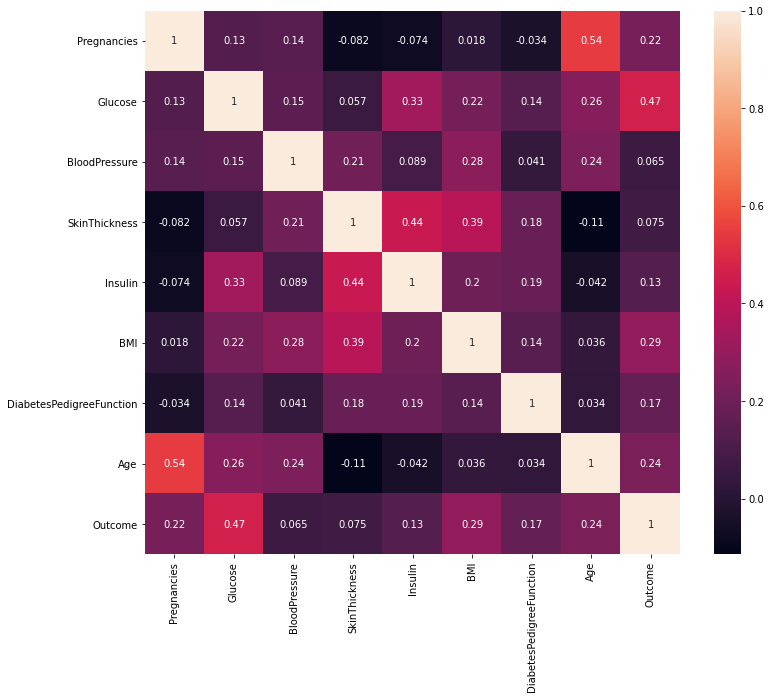

In [ ]:
plt.figure(figsize = (12,10))

sns.heatmap(pima.corr(), annot =True)

In [ ]:
#Let's create numpy arrays for features and target
X = pima.drop('Outcome',axis=1).values
y = pima['Outcome'].values

In [ ]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

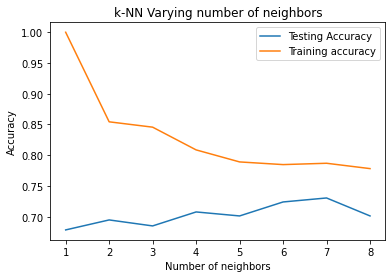

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.7305194805194806

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)


In [ ]:
confusion_matrix(y_test,y_pred)

array([[165,  36],
       [ 47,  60]])

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,165,36,201
1,47,60,107
All,212,96,308


In [ ]:
#import classification_report
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       201
           1       0.62      0.56      0.59       107

    accuracy                           0.73       308
   macro avg       0.70      0.69      0.70       308
weighted avg       0.73      0.73      0.73       308



In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

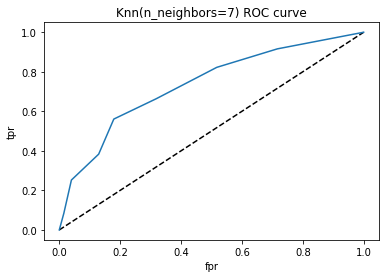

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7345050448691124

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
knn_cv.best_score_

0.7578558696205755

In [ ]:
knn_cv.best_params_

{'n_neighbors': 14}

7. Use titanic dataset. Handle the null values and convert the categorical values into numerical values. Make a classification model using k-nn classifier to predict the survival of a passenger on 
the ship. Use “gridsearchCV( )” to find the best value of ‘k’.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import seaborn as sns
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, accuracy_score 
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
kfold = StratifiedKFold(n_splits=10)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving test.csv to test.csv


In [ ]:
#import dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test.shape

(418, 11)

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

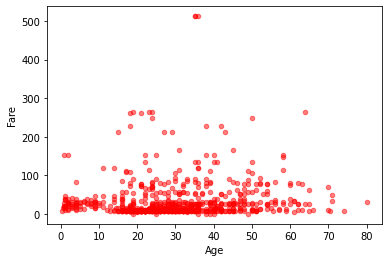

In [ ]:
#We can see the relationship between two variables through the following plot
train.plot(kind='scatter', x='Age', y='Fare',alpha = 0.5,color = 'red')
plt.show()

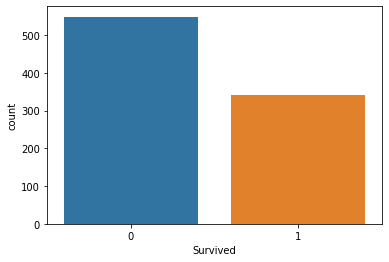

In [ ]:
#Survived passengers visualization
sns.countplot(x='Survived', data=train)
plt.show()

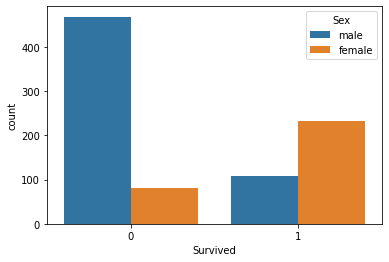

In [ ]:
#Survived passengers visualization as male & female
sns.countplot(x='Survived', hue='Sex', data=train,)
plt.show()

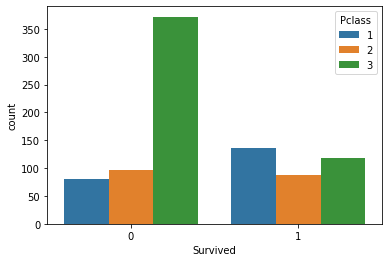

In [ ]:
#Survived passengers visualization for Pclass
sns.countplot(x='Survived', hue='Pclass', data=train)
plt.show()

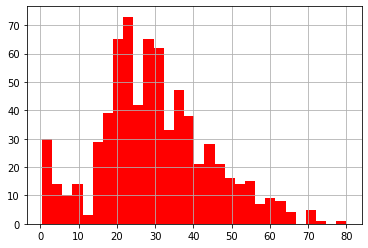

In [ ]:
#Age distribution
train["Age"].hist(bins=30, color='red')
plt.show()

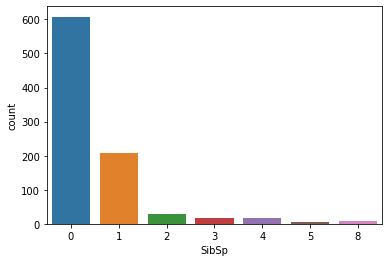

In [ ]:
sns.countplot(x='SibSp', data=train)
plt.show()

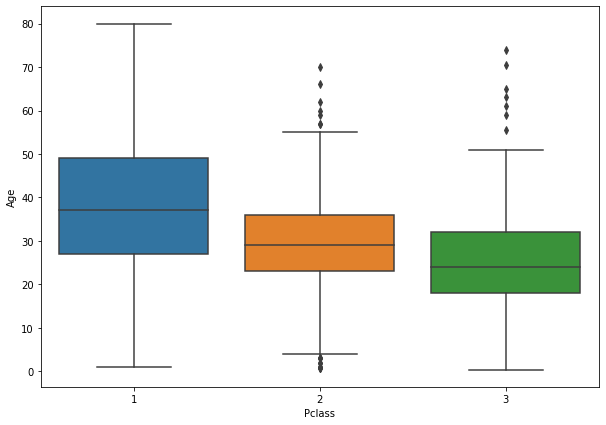

In [ ]:
#Boxplot visualization for Age & Pclass
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass", y="Age", data=train)
plt.show()

In [ ]:
# Age imputation for missing values in train
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 38
        
        elif Pclass==2:
            return 29
        
        else:
            return 25
    else:
            return Age

In [ ]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

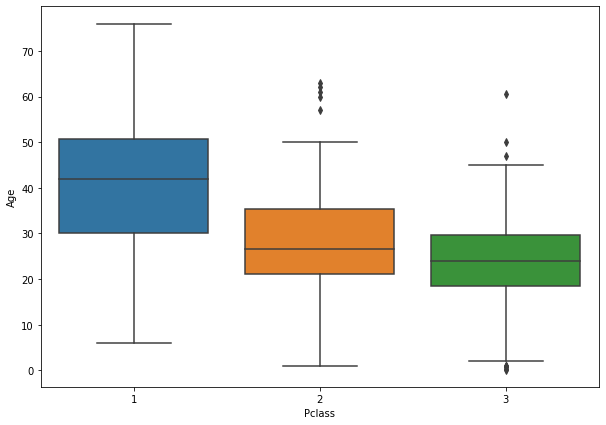

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass", y="Age", data=test)
plt.show()

In [ ]:
# Age imputation for missing values in test
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 42
        
        elif Pclass==2:
            return 27
        
        else:
            return 24
    else:
            return Age

In [ ]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
#dropping Cabin feature due to high number of missing values
train.drop('Cabin',axis=1,inplace=True)

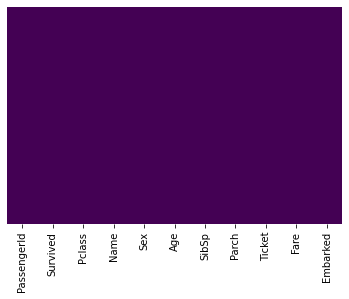

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False, cmap='viridis')
plt.show()

In [ ]:
#dropping Cabin feature due to high number of missing values 
test.drop('Cabin',axis=1,inplace=True)

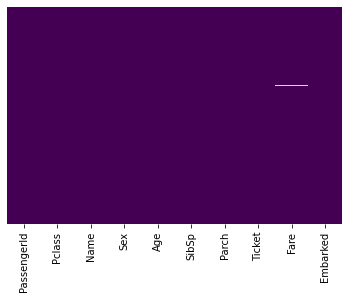

In [ ]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False, cmap='viridis')
plt.show()

In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

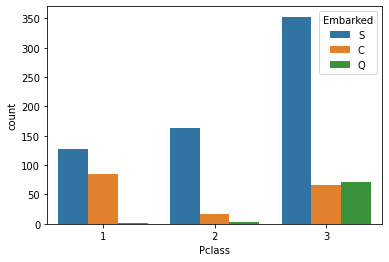

In [ ]:
sns.countplot('Pclass', hue='Embarked', data=train)
plt.show()

In [ ]:
#Filling missing values of Embarked with most frequent value 'S'
train['Embarked']= train['Embarked'].fillna('S')

In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

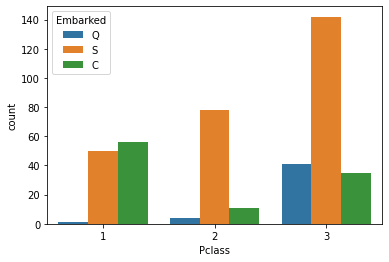

In [ ]:
#checking Embarked values as per Pclass
sns.countplot('Pclass', hue='Embarked', data=test)
plt.show()

In [ ]:
#Filling missing values of Embarked with most frequent value 'S'
test['Embarked']= test['Embarked'].fillna('S')

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
#Filling missing values in Fare column with 0
test['Fare']= test['Fare'].fillna(0)

In [ ]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# Create categorical values for Pclass
train["Pclass"] = train["Pclass"].astype("category")
train = pd.get_dummies(train, columns = ["Pclass"],prefix="Pc")

In [ ]:
# creating dummy variable for Sex in train dataset
sx= pd.get_dummies(train['Sex'], prefix='Sex_')

In [ ]:
# creating dummy variable for Embarked in train dataset
embk= pd.get_dummies(train['Embarked'], prefix='Embarked_')

In [ ]:
# Dropping features Sex,Embarked,Name & Ticket
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [ ]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pc_1,Pc_2,Pc_3
0,1,0,22.0,1,0,7.2500,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0
4,5,0,35.0,0,0,8.0500,0,0,1


In [ ]:
# creating dummy variable for Sex in test dataset
sx_1= pd.get_dummies(test['Sex'], prefix='Sex_')

In [ ]:
# creating dummy variable for Embarked in test dataset
embk_1= pd.get_dummies(test['Embarked'],prefix='Embarked_')

In [ ]:
# concatinating new created features with train dataset
train= pd.concat([train,sx,embk],axis=1)

In [ ]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pc_1,Pc_2,Pc_3,Sex__female,Sex__male,Embarked__C,Embarked__Q,Embarked__S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [ ]:
# Create categorical values for Pclass
test["Pclass"] = test["Pclass"].astype("category")
test = pd.get_dummies(test, columns = ["Pclass"],prefix="Pc")

In [ ]:
# Dropping features Sex,Embarked,Name & Ticket
test.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [ ]:
# concatinating new created features with test dataset
test= pd.concat([test,sx_1,embk_1],axis=1)

In [ ]:
#Seperating dependent and independent variables
X = train.drop(columns=['Survived'],axis=1)
y = train['Survived']

In [ ]:
#train-test split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=22)

In [ ]:
#Logistic Regression
clf = LogisticRegression()
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)
accuracy_score(test_y, y_pred)

0.7835820895522388

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(train_X, train_y)
y_pred = clf_dt.predict(test_X)
accuracy_score(test_y, y_pred)

0.7798507462686567

In [ ]:
#Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
rf_clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)
accuracy_score(test_y, y_pred)

0.7835820895522388

In [ ]:
# RFC Parameters tunning 
rf_clf = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [4,6],
              "max_features": [5,10],
              "min_samples_split": [2, 6],
              "min_samples_leaf": [1, 5],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gs_rf_clf = GridSearchCV(rf_clf,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gs_rf_clf.fit(train_X, train_y)
y_pred = gs_rf_clf.predict(test_X)
accuracy_score(test_y, y_pred)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  1.6min finished


0.7873134328358209

In [ ]:
gs_rf_clf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
 #KNN
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(train_X, train_y)

y_pred = knn.predict(test_X)

accuracy_score(test_y, y_pred)

0.6194029850746269

In [ ]:
#BaggingClassifier
from sklearn.ensemble import BaggingClassifier
model_bg=BaggingClassifier(n_estimators=100, bootstrap_features=True)
model_bg.fit(train_X, train_y)
y_pred = model_bg.predict(test_X)
print(accuracy_score(test_y, y_pred))

0.8097014925373134


In [ ]:
param_grid = {
    'base_estimator__max_depth' : [3, 4, 5],
    'max_samples' : [0.1, 0.2, 0.5]
}

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),
                                     n_estimators = 100, max_features = 0.5),
                   param_grid, scoring = "accuracy")
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)
accuracy_score(test_y, y_pred)

0.7947761194029851

In [ ]:
clf.best_params_

{'base_estimator__max_depth': 3, 'max_samples': 0.5}

In [ ]:
model_gb= GradientBoostingClassifier()
model_gb.fit(train_X,train_y)
y_pred = model_gb.predict(test_X)
accuracy_score(test_y, y_pred)

0.7798507462686567

In [ ]:
model_gb = GradientBoostingClassifier()
gb_param_grid = {'n_estimators' : [100,300],
              'learning_rate': [0.1, 0.05],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
               }

gsmodel_gb = GridSearchCV(model_gb,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsmodel_gb.fit(train_X,train_y)
y_pred = gsmodel_gb.predict(test_X)
accuracy_score(test_y, y_pred)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   21.3s finished


0.7835820895522388

In [ ]:
gsmodel_gb.best_params_

{'learning_rate': 0.05,
 'max_depth': 4,
 'min_samples_leaf': 100,
 'n_estimators': 100}

In [ ]:
submission_predictions = model_bg.predict(test)

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": submission_predictions
    })
submission.to_csv('titanic.csv', index=False)